# Data Cleaning and Classification

In this section we will perform a couple of task
- Clean the missing values
- Classify the data


## 1. Data Cleaning

After the processing the dataset we generated had few missing value columns
- gender
- income
- age

Since these are important demographic features we need a good way to deal with them without losing the variance associated with them

In [2]:
import pandas as pd
import numpy as np
import math
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import helpers
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


### 1.1 Read the Data saved after data exploration

In [101]:
all_data = pd.read_csv("all_data.csv")
all_data

,gender,age,income,gender_old,mem_year,mem_month,mem_day,p_id,total_spending,total_reward,...,total_offer_viewed,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration
0,3,NaN,NaN,NaN,2017,2,12,6961,20.40,5.0,...,4.0,2.0,4.0,4.0,4.0,4.0,5.0,37.57,11.750000,8.500000
1,0,55.0,112000.0,F,2017,7,15,398,77.01,5.0,...,0.0,1.0,2.0,2.0,2.0,2.0,5.0,46.44,2.500000,5.500000
2,3,NaN,NaN,NaN,2018,7,12,3746,14.30,0.0,...,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.14,2.500000,5.000000
3,0,75.0,100000.0,F,2017,5,9,7996,159.27,20.0,...,3.0,2.0,3.0,3.0,3.0,3.0,15.0,135.34,5.000000,5.666667
4,3,NaN,NaN,NaN,2017,8,4,10735,4.65,0.0,...,5.0,0.0,6.0,6.0,6.0,6.0,0.0,2.30,13.333333,7.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,45.0,54000.0,F,2018,6,4,7264,20.03,0.0,...,3.0,0.0,3.0,3.0,3.0,3.0,0.0,6.76,5.666667,5.000000
16996,1,61.0,72000.0,M,2018,7,13,2887,25.97,5.0,...,1.0,1.0,3.0,3.0,3.0,3.0,5.0,6.46,1.666667,4.666667
16997,1,49.0,73000.0,M,2017,1,26,105,39.74,0.0,...,1.0,0.0,3.0,3.0,3.0,3.0,0.0,30.11,6.666667,5.666667
16998,0,83.0,50000.0,F,2016,3,7,10567,189.67,25.0,...,1.0,1.0,1.0,1.0,1.0,1.0,10.0,57.50,10.000000,5.000000


## 1.2 Cleaning up gender data

### 1.2.1 Exploring Missing Gender Data

In [102]:
available_gender_data = all_data[all_data['gender_old'].notnull()]
available_gender_data

,gender,age,income,gender_old,mem_year,mem_month,mem_day,p_id,total_spending,total_reward,...,total_offer_viewed,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration
1,0,55.0,112000.0,F,2017,7,15,398,77.01,5.0,...,0.0,1.0,2.0,2.0,2.0,2.0,5.0,46.44,2.500000,5.500000
3,0,75.0,100000.0,F,2017,5,9,7996,159.27,20.0,...,3.0,2.0,3.0,3.0,3.0,3.0,15.0,135.34,5.000000,5.666667
5,1,68.0,70000.0,M,2018,4,26,15043,57.73,7.0,...,3.0,2.0,4.0,4.0,4.0,4.0,7.0,36.84,6.250000,7.000000
8,1,65.0,53000.0,M,2018,2,9,3728,36.43,19.0,...,5.0,5.0,5.0,5.0,5.0,5.0,19.0,63.32,7.000000,6.800000
12,1,58.0,51000.0,M,2017,11,11,3059,15.62,2.0,...,2.0,1.0,3.0,3.0,3.0,3.0,2.0,15.62,5.666667,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,45.0,54000.0,F,2018,6,4,7264,20.03,0.0,...,3.0,0.0,3.0,3.0,3.0,3.0,0.0,6.76,5.666667,5.000000
16996,1,61.0,72000.0,M,2018,7,13,2887,25.97,5.0,...,1.0,1.0,3.0,3.0,3.0,3.0,5.0,6.46,1.666667,4.666667
16997,1,49.0,73000.0,M,2017,1,26,105,39.74,0.0,...,1.0,0.0,3.0,3.0,3.0,3.0,0.0,30.11,6.666667,5.666667
16998,0,83.0,50000.0,F,2016,3,7,10567,189.67,25.0,...,1.0,1.0,1.0,1.0,1.0,1.0,10.0,57.50,10.000000,5.000000


In [103]:
missing_gender_data = all_data[all_data['gender_old'].isnull()]
missing_gender_data

,gender,age,income,gender_old,mem_year,mem_month,mem_day,p_id,total_spending,total_reward,...,total_offer_viewed,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration
0,3,NaN,NaN,NaN,2017,2,12,6961,20.40,5.0,...,4.0,2.0,4.0,4.0,4.0,4.0,5.0,37.57,11.750000,8.500000
2,3,NaN,NaN,NaN,2018,7,12,3746,14.30,0.0,...,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.14,2.500000,5.000000
4,3,NaN,NaN,NaN,2017,8,4,10735,4.65,0.0,...,5.0,0.0,6.0,6.0,6.0,6.0,0.0,2.30,13.333333,7.833333
6,3,NaN,NaN,NaN,2017,9,25,9524,0.00,0.0,...,6.0,0.0,6.0,6.0,6.0,6.0,0.0,0.00,8.333333,7.666667
7,3,NaN,NaN,NaN,2017,10,2,6939,0.24,0.0,...,4.0,0.0,5.0,5.0,5.0,5.0,0.0,0.24,8.400000,6.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16980,3,NaN,NaN,NaN,2016,9,1,6128,25.25,5.0,...,3.0,1.0,5.0,5.0,5.0,5.0,5.0,52.95,8.400000,6.400000
16982,3,NaN,NaN,NaN,2016,4,15,14483,31.02,5.0,...,3.0,2.0,4.0,4.0,4.0,4.0,5.0,34.74,9.250000,7.750000
16989,3,NaN,NaN,NaN,2018,3,5,13480,0.76,0.0,...,6.0,0.0,6.0,6.0,6.0,6.0,0.0,1.52,6.000000,6.166667
16991,3,NaN,NaN,NaN,2016,1,16,11374,21.88,0.0,...,1.0,0.0,4.0,4.0,4.0,4.0,0.0,19.78,5.000000,5.250000


<AxesSubplot:>

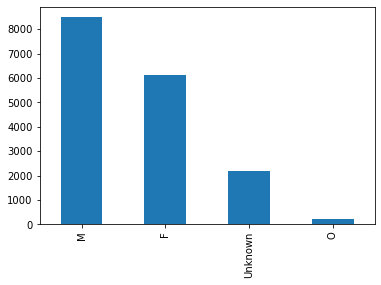

In [104]:
genders = all_data['gender_old'].replace({None: 'Unknown'})
genders.value_counts().plot(kind='bar')

#### 1.2.2 Predict Missing Gender Data

Drop other missing data column with the `available_gender_data`

In [105]:
#store irrelevant data for later 
other_column = ['income', 'age', 'gender_old', 'p_id']
available_gender_data_other_data = available_gender_data[other_column]
available_gender_data_other_data

,income,age,gender_old,p_id
1,112000.0,55.0,F,398
3,100000.0,75.0,F,7996
5,70000.0,68.0,M,15043
8,53000.0,65.0,M,3728
12,51000.0,58.0,M,3059
...,...,...,...,...
16995,54000.0,45.0,F,7264
16996,72000.0,61.0,M,2887
16997,73000.0,49.0,M,105
16998,50000.0,83.0,F,10567


In [106]:
available_gender_data = available_gender_data.drop(columns_to_drop, axis='columns')
available_gender_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_viewed,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration
1,0,2017,7,15,77.01,5.0,1.0,0.0,0.0,5.0,...,0.0,1.0,2.0,2.0,2.0,2.0,5.0,46.44,2.500000,5.500000
3,0,2017,5,9,159.27,20.0,2.0,0.0,0.0,7.5,...,3.0,2.0,3.0,3.0,3.0,3.0,15.0,135.34,5.000000,5.666667
5,1,2018,4,26,57.73,7.0,1.0,1.0,0.0,5.0,...,3.0,2.0,4.0,4.0,4.0,4.0,7.0,36.84,6.250000,7.000000
8,1,2018,2,9,36.43,19.0,3.0,2.0,0.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,19.0,63.32,7.000000,6.800000
12,1,2017,11,11,15.62,2.0,0.0,1.0,0.0,0.0,...,2.0,1.0,3.0,3.0,3.0,3.0,2.0,15.62,5.666667,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,2018,6,4,20.03,0.0,0.0,0.0,0.0,10.0,...,3.0,0.0,3.0,3.0,3.0,3.0,0.0,6.76,5.666667,5.000000
16996,1,2018,7,13,25.97,5.0,1.0,0.0,0.0,5.0,...,1.0,1.0,3.0,3.0,3.0,3.0,5.0,6.46,1.666667,4.666667
16997,1,2017,1,26,39.74,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,3.0,3.0,3.0,0.0,30.11,6.666667,5.666667
16998,0,2016,3,7,189.67,25.0,1.0,0.0,0.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,10.0,57.50,10.000000,5.000000


Create training and test set

In [107]:
available_gender_data[available_gender_data.isna().any(axis=1)]

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_viewed,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration


In [108]:
ss = StandardScaler()
collist = available_gender_data.columns.tolist()
collist.remove('gender')
available_gender_data_scaled =available_gender_data.copy(deep=True)
available_gender_data_scaled[collist] = ss.fit_transform(available_gender_data_scaled[collist])
available_gender_data_scaled


,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_viewed,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration
1,0,0.317000,0.087257,-0.103348,-0.307925,-0.628148,0.118484,-0.916214,0.0,-0.421626,...,-2.033889,-0.607078,-1.535989,-1.535989,-1.535989,-1.535989,-0.506165,-0.459364,-1.690426,-0.769882
3,0,0.317000,-0.486016,-0.789276,0.325036,0.988271,1.097046,-0.916214,0.0,0.337557,...,-0.193083,0.027972,-0.858521,-0.858521,-0.858521,-0.858521,0.620022,0.049236,-0.855777,-0.633531
5,1,1.151582,-0.772653,1.154186,-0.456278,-0.412626,0.118484,-0.065530,0.0,-0.421626,...,-0.193083,0.027972,-0.181054,-0.181054,-0.181054,-0.181054,-0.280927,-0.514285,-0.438453,0.457279
8,1,1.151582,-1.345927,-0.789276,-0.620174,0.880509,2.075609,0.785154,0.0,-0.421626,...,1.034121,1.933123,0.496413,0.496413,0.496413,0.496413,1.070496,-0.362793,-0.188058,0.293657
12,1,0.317000,1.233805,-0.560633,-0.780299,-0.951432,-0.860079,-0.065530,0.0,-1.939993,...,-0.806685,-0.607078,-0.858521,-0.858521,-0.858521,-0.858521,-0.844021,-0.635686,-0.633204,0.457279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,1.151582,-0.199379,-1.360882,-0.746366,-1.166954,-0.860079,-0.916214,0.0,1.096740,...,-0.193083,-1.242129,-0.858521,-0.858521,-0.858521,-0.858521,-1.069258,-0.686374,-0.633204,-1.178935
16996,1,1.151582,0.087257,-0.331991,-0.700660,-0.628148,0.118484,-0.916214,0.0,-0.421626,...,-1.420287,-0.607078,-0.858521,-0.858521,-0.858521,-0.858521,-0.506165,-0.688090,-1.968642,-1.451637
16997,1,0.317000,-1.632563,1.154186,-0.594704,-1.166954,-0.860079,-0.916214,0.0,-1.939993,...,-1.420287,-1.242129,-0.858521,-0.858521,-0.858521,-0.858521,-1.069258,-0.552788,-0.299344,-0.633531
16998,0,-0.517582,-1.059290,-1.017918,0.558953,1.527077,0.118484,-0.916214,0.0,1.096740,...,-1.420287,-0.607078,-2.213456,-2.213456,-2.213456,-2.213456,0.056928,-0.396089,0.813521,-1.178935


In [109]:
available_gender_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_viewed,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration
1,0,2017,7,15,77.01,5.0,1.0,0.0,0.0,5.0,...,0.0,1.0,2.0,2.0,2.0,2.0,5.0,46.44,2.500000,5.500000
3,0,2017,5,9,159.27,20.0,2.0,0.0,0.0,7.5,...,3.0,2.0,3.0,3.0,3.0,3.0,15.0,135.34,5.000000,5.666667
5,1,2018,4,26,57.73,7.0,1.0,1.0,0.0,5.0,...,3.0,2.0,4.0,4.0,4.0,4.0,7.0,36.84,6.250000,7.000000
8,1,2018,2,9,36.43,19.0,3.0,2.0,0.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,19.0,63.32,7.000000,6.800000
12,1,2017,11,11,15.62,2.0,0.0,1.0,0.0,0.0,...,2.0,1.0,3.0,3.0,3.0,3.0,2.0,15.62,5.666667,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,2018,6,4,20.03,0.0,0.0,0.0,0.0,10.0,...,3.0,0.0,3.0,3.0,3.0,3.0,0.0,6.76,5.666667,5.000000
16996,1,2018,7,13,25.97,5.0,1.0,0.0,0.0,5.0,...,1.0,1.0,3.0,3.0,3.0,3.0,5.0,6.46,1.666667,4.666667
16997,1,2017,1,26,39.74,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,3.0,3.0,3.0,0.0,30.11,6.666667,5.666667
16998,0,2016,3,7,189.67,25.0,1.0,0.0,0.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,10.0,57.50,10.000000,5.000000


In [110]:
train, test = train_test_split(available_gender_data_scaled, test_size=0.3, random_state=41)
X_train = train.drop(['gender'], axis='columns')
y_train = train['gender']

X_test = test.drop(['gender'], axis='columns')
y_test = test['gender']

In [111]:
X_train
X_train[X_train.isna().any(axis=1)]

,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,average_offer_difficulty_discount,...,total_offer_viewed,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration


In [14]:
def do_pca(data, n_components=None):
    '''
    DESCRIPTION:
        Transforms data using PCA to create n_components, and provides back the results of the
        transformation.
    INPUTS:
        data - the data you would like to transform
        n_components - int - the number of principal components to create
    OUTPUTS: 
        pca - the pca object created after fitting the data
        X_pca - the transformed X matrix with new number of components
    '''
    pca = PCA(n_components)
    X_pca = pd.DataFrame(pca.fit_transform(data))
    if n_components != None:
        X_pca.columns = ["pca_comp_" + str(i) for i in range(n_components)]
    X_pca.index = data.index
    
    return pca, X_pca

def scree_plot(pca, n_comp=None):
    '''
    DESCRIPTION:
        Creates a scree plot associated with the principal components 
    
    INPUTS:
        pca - the result of instantian of PCA in scikit learn    
    
    OUTPUTS:
        None
    '''
    if n_comp == None: # If no n_comp is provided, use all components
        num_components = len(pca.explained_variance_ratio_) #n_comp is provided
    elif n_comp < len(pca.explained_variance_ratio_):
        num_components = n_comp
    else: 
        #If the n_comp provided is greater than the total number of components,
        # then use all components
        num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    values = pca.explained_variance_ratio_
    
    values = values[:num_components]
    
    plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    # Create array of cumulative variance explained for each n^th component
    cumulative_values = np.cumsum(values)
    # Plot bar chart of variance explained vs each component
    ax.bar(indices, values, color='tab:red')
    # Plot line chart of cumulative variance explained vs number of components
    ax.plot(indices, cumulative_values)
    
    # Plot the annotations only if there are less than 21 components, 
    # else it gets messy
    if num_components <= 20:
        for i in range(num_components):
            ax.annotate(r"%s%%" % ((str(values[i]*100)[:4])),\
                        (indices[i]+0.2, values[i]), va="bottom",\
                        ha="center", fontsize=12)
        
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
    
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

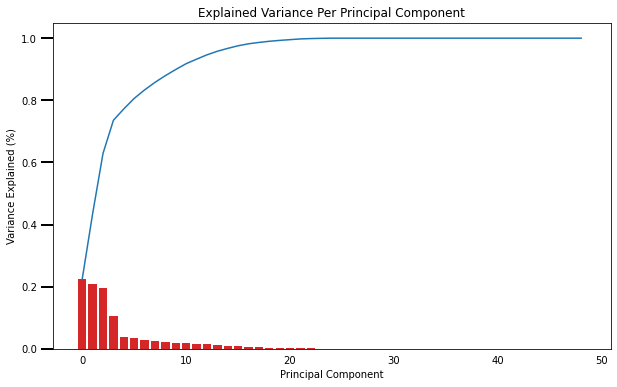

In [113]:
pca, X_train_pca_0 = do_pca(X_train)
scree_plot(pca)

In [114]:
n_components = 25
pca, X_train_pca = do_pca(X_train, n_components)
X_train_actual = X_train
X_train = X_train_pca
X_train.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24
6867,-0.974609,-5.565929,0.366406,1.285926,0.102396,0.282951,1.231576,-1.604966,-0.105675,-0.187709,...,-0.014174,-0.595451,0.381555,0.470795,-0.468375,-0.406741,-0.263693,0.221624,0.005618,0.208363
11349,-2.937974,-1.432295,3.896011,-1.377217,-2.186239,0.900010,0.478653,-0.423223,-1.039338,-0.248107,...,0.625949,0.702969,0.103307,0.416689,0.517130,1.088250,0.073544,-0.073166,-0.312250,0.186384
5171,4.283530,-1.249464,-0.943209,-0.476931,0.305805,-0.322054,-0.460981,1.141788,-0.569341,-1.194378,...,-0.571715,0.648817,0.339960,0.134099,0.025142,-0.006704,0.125199,-0.040243,0.212963,0.062220
3054,1.440768,-3.000575,-2.772375,-1.403914,-2.340191,0.946805,0.338701,-0.312028,1.317909,0.960851,...,0.072674,-0.293218,0.385839,-0.482999,-0.222179,0.326799,0.363457,-0.316813,0.013771,-0.270981
13252,1.017295,-0.251745,3.475389,-3.164302,-0.925963,0.405100,-1.197023,1.523455,-0.817611,1.124633,...,-0.304464,-0.198140,-0.192900,0.661027,0.338854,0.947795,0.056585,-0.019895,0.144030,0.058310


In [115]:
X_test_pca = pd.DataFrame(pca.transform(X_test))
X_test_pca.columns = ["pca_comp_" + str(i) for i in range(n_components)]
X_test_pca.index = X_test.index
X_test_actual = X_test
X_test = X_test_pca
X_test.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24
1699,-0.869882,1.617811,-0.688445,2.406402,-0.294451,0.888554,-0.197118,-0.229934,0.438781,0.012570,...,-0.051667,0.321626,0.143590,0.213295,-0.405123,-0.172544,0.133227,0.048101,0.116239,-0.240460
6701,6.926211,0.553976,-0.088661,1.029072,0.235639,-1.786658,1.291029,0.410880,1.236516,-0.463010,...,0.370647,-0.097389,-0.168999,-0.069316,0.056706,0.170432,-0.941496,-0.259229,0.172870,0.082945
405,-0.936538,2.490379,1.473324,2.445449,-2.554935,0.559448,1.668848,0.221668,-0.799424,0.351084,...,0.404977,-0.145839,-0.131731,-0.345022,0.678741,-0.378306,0.253096,0.141257,-0.070535,0.311147
125,-1.573938,0.736298,-0.611323,-0.147723,-0.468082,-0.416272,-0.772141,0.582231,0.571034,-0.592613,...,-0.657976,0.265848,0.390922,0.005619,-0.014523,-0.172971,0.113539,-0.149719,-0.175971,-0.116671
1497,-3.280652,4.379223,-5.272444,1.252247,1.109468,-1.294993,-0.868662,-1.111149,-0.825239,0.369357,...,0.011198,-0.250418,-0.465634,0.114986,0.264763,-0.277207,0.130250,0.114393,-0.164489,0.055819


In [116]:
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,8))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, x = 0.63, y = 1.05)
    # Tune the subplot layout
    # Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html for more details on the arguments
    pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
    pl.tight_layout()
    pl.show()

In [117]:
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,8))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, x = 0.63, y = 1.05)
    # Tune the subplot layout
    # Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html for more details on the arguments
    plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
    plt.tight_layout()
    plt.show()

In [118]:
from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    results = {}

    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[0:sample_size], y_train[0:sample_size])
    end = time() # Get end time

    # TODO: Calculate the training time
    results['train_time'] = end - start

    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[0:sample_size])
    end = time() # Get end time

    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start

    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[0:sample_size], predictions_train[0:sample_size])

    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[0:sample_size], predictions_train[0:sample_size], beta=0.5, average='micro')

    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')

    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    # Return the results
    return results

AdaBoostClassifier trained on 104 samples.
AdaBoostClassifier trained on 1038 samples.
AdaBoostClassifier trained on 10377 samples.
GaussianNB trained on 104 samples.
GaussianNB trained on 1038 samples.
GaussianNB trained on 10377 samples.
LinearSVC trained on 104 samples.


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC trained on 1038 samples.


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC trained on 10377 samples.


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:65: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


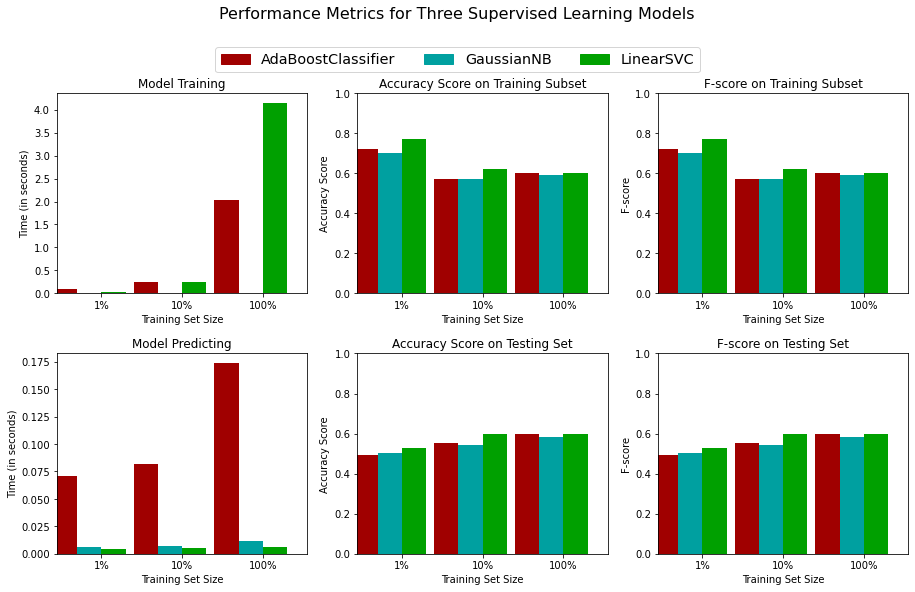

In [119]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from time import time

random_state = 88
clf_A = AdaBoostClassifier(random_state=random_state)
clf_B = GaussianNB()
clf_C = LinearSVC(random_state=random_state)


samples_100 = len(y_train)
samples_10 = round(0.1*len(y_train))
samples_1 = round(0.01*len(y_train))

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results)

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, make_scorer

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=random_state)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
#parameters = {'var_smoothing': np.logspace(20,-20, num=100)}
parameters = {"n_estimators": list(range(98,102))}


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5, average='micro')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5, average='micro')))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5, average='micro')))

Unoptimized model
------
Accuracy score on testing data: 0.5967
F-score on testing data: 0.5967

Optimized Model
------
Final accuracy score on the testing data: 0.6014
Final F-score on the testing data: 0.6014


In [121]:
gender_predictor = best_clf

In [122]:
#store irrelevant data for later 
missing_gender_data_other_data = missing_gender_data[other_column]
missing_gender_data_other_data

,income,age,gender_old,p_id
0,NaN,NaN,NaN,6961
2,NaN,NaN,NaN,3746
4,NaN,NaN,NaN,10735
6,NaN,NaN,NaN,9524
7,NaN,NaN,NaN,6939
...,...,...,...,...
16980,NaN,NaN,NaN,6128
16982,NaN,NaN,NaN,14483
16989,NaN,NaN,NaN,13480
16991,NaN,NaN,NaN,11374


In [123]:
missing_gender_data = missing_gender_data.drop(other_column, axis='columns')
missing_gender_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_viewed,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration
0,3,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,4.0,2.0,4.0,4.0,4.0,4.0,5.0,37.57,11.750000,8.500000
2,3,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.14,2.500000,5.000000
4,3,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,5.0,0.0,6.0,6.0,6.0,6.0,0.0,2.30,13.333333,7.833333
6,3,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,6.0,0.0,6.0,6.0,6.0,6.0,0.0,0.00,8.333333,7.666667
7,3,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,4.0,0.0,5.0,5.0,5.0,5.0,0.0,0.24,8.400000,6.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16980,3,2016,9,1,25.25,5.0,1.0,0.0,0.0,5.000000,...,3.0,1.0,5.0,5.0,5.0,5.0,5.0,52.95,8.400000,6.400000
16982,3,2016,4,15,31.02,5.0,0.0,2.0,0.0,10.000000,...,3.0,2.0,4.0,4.0,4.0,4.0,5.0,34.74,9.250000,7.750000
16989,3,2018,3,5,0.76,0.0,0.0,0.0,0.0,5.000000,...,6.0,0.0,6.0,6.0,6.0,6.0,0.0,1.52,6.000000,6.166667
16991,3,2016,1,16,21.88,0.0,0.0,0.0,0.0,10.000000,...,1.0,0.0,4.0,4.0,4.0,4.0,0.0,19.78,5.000000,5.250000


In [124]:
missing_gender_data_scaled = missing_gender_data.copy(deep=True)
missing_gender_data_scaled[collist] = ss.transform(missing_gender_data[collist])
missing_gender_data_scaled

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_viewed,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration
0,3,0.317000,-1.345927,-0.446312,-0.743519,-0.628148,-0.860079,0.785154,0.0,-1.939993,...,0.420519,0.027972,-0.181054,-0.181054,-0.181054,-0.181054,-0.506165,-0.510109,1.397775,1.684439
2,3,1.151582,0.087257,-0.446312,-0.790456,-1.166954,-0.860079,-0.916214,0.0,-0.421626,...,-0.806685,-1.242129,-1.535989,-1.535989,-1.535989,-1.535989,-1.069258,-0.712805,-1.690426,-1.178935
4,3,0.317000,0.373894,-1.360882,-0.864709,-1.166954,-0.860079,-0.916214,0.0,-1.939993,...,1.034121,-1.242129,1.173881,1.173881,1.173881,1.173881,-1.069258,-0.711890,1.926386,1.139034
6,3,0.317000,0.660531,1.039865,-0.900489,-1.166954,-0.860079,-0.916214,0.0,1.096740,...,1.647723,-1.242129,1.173881,1.173881,1.173881,1.173881,-1.069258,-0.725048,0.257088,1.002683
7,3,0.317000,0.947168,-1.589525,-0.898643,-1.166954,-0.860079,-0.916214,0.0,0.590618,...,0.420519,-1.242129,0.496413,0.496413,0.496413,0.496413,-1.069258,-0.723675,0.279346,0.130036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16980,3,-0.517582,0.660531,-1.703846,-0.706200,-0.628148,0.118484,-0.916214,0.0,-0.421626,...,-0.193083,-0.607078,0.496413,0.496413,0.496413,0.496413,-0.506165,-0.422120,0.279346,-0.033586
16982,3,-0.517582,-0.772653,-0.103348,-0.661802,-0.628148,-0.860079,0.785154,0.0,1.096740,...,-0.193083,0.027972,-0.181054,-0.181054,-0.181054,-0.181054,-0.506165,-0.526300,0.563126,1.070859
16989,3,1.151582,-1.059290,-1.246561,-0.894641,-1.166954,-0.860079,-0.916214,0.0,-0.421626,...,1.647723,-1.242129,1.173881,1.173881,1.173881,1.173881,-1.069258,-0.716352,-0.521917,-0.224477
16991,3,-0.517582,-1.632563,0.010973,-0.732131,-1.166954,-0.860079,-0.916214,0.0,1.096740,...,-1.420287,-1.242129,-0.181054,-0.181054,-0.181054,-0.181054,-1.069258,-0.611886,-0.855777,-0.974408


In [125]:
X_predict = missing_gender_data_scaled.drop(['gender'], axis='columns')
X_predict_pca = pd.DataFrame(pca.transform(X_predict))
X_predict_pca.columns = ["pca_comp_" + str(i) for i in range(n_components)]
X_predict_pca.index = X_predict.index
X_predict_actual = X_predict
X_predict = X_predict_pca
X_predict

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24
0,5.846858,-3.725781,0.657568,-1.411593,1.091863,-1.018270,-1.144144,-1.707951,-0.164800,1.076644,...,-0.335828,-0.501001,0.152757,0.208034,0.444335,0.014104,0.225317,-0.125623,-0.062668,-0.007685
2,-4.894780,-3.773195,-1.192306,-0.221338,2.061275,-0.623491,-0.657076,0.933380,-0.500795,-0.393796,...,0.395908,-0.386807,0.476984,-0.825937,-0.023381,0.185284,-0.127025,0.266722,-0.313117,0.088702
4,3.957418,-2.287385,5.275481,-2.795187,-1.068871,0.013068,-0.089460,-1.933522,-1.092548,2.576628,...,-1.234030,-0.931537,-0.125335,0.049442,1.214019,0.404758,0.540971,-0.389494,-0.035165,-0.268471
6,3.300509,-0.043795,3.234556,-3.783665,0.411231,-0.511852,-0.092130,1.521650,1.021652,2.099819,...,-1.123728,-0.600890,-0.112166,0.095114,0.074516,-0.316558,-0.027379,0.136466,0.415116,0.351207
7,0.210009,1.203925,-1.601663,-4.194783,1.202401,0.502448,0.723068,0.312212,-1.647515,0.781247,...,0.280779,0.292611,-0.142857,0.191234,0.545770,-0.344576,0.079029,0.112920,0.041024,0.004288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16980,1.595322,-0.819156,1.374180,-1.639627,-0.191927,-0.402408,0.429212,0.062886,-1.655931,1.887062,...,-0.045006,0.216243,0.152330,-0.214942,0.365342,0.574535,0.114294,-0.079741,0.176087,-0.207098
16982,3.438746,-1.737610,-0.823163,-1.609111,0.573950,-0.748295,-0.403674,1.957239,-0.206481,-0.021641,...,0.478336,-0.061859,0.010924,0.457808,0.357076,-0.395347,0.236453,-0.050439,0.050886,0.159281
16989,2.700614,-0.214469,3.600969,-3.626479,1.682028,-0.856173,-1.888054,0.236987,-1.055524,1.810987,...,-0.516515,-0.084046,-0.111206,-0.731322,0.482857,-0.110599,-0.133190,0.222740,0.059085,-0.081343
16991,-5.188773,-1.045401,0.683736,-0.994113,1.178136,-0.037158,-0.668302,1.628688,-0.043335,-1.120984,...,0.176067,-0.590638,-0.035085,0.746708,0.737328,-0.589344,0.432843,-0.108053,0.082425,0.072612


In [126]:
missing_gender_data['gender']=gender_predictor.predict(X_predict)

In [127]:
missing_gender_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_viewed,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration
0,1,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,4.0,2.0,4.0,4.0,4.0,4.0,5.0,37.57,11.750000,8.500000
2,1,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.14,2.500000,5.000000
4,1,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,5.0,0.0,6.0,6.0,6.0,6.0,0.0,2.30,13.333333,7.833333
6,1,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,6.0,0.0,6.0,6.0,6.0,6.0,0.0,0.00,8.333333,7.666667
7,1,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,4.0,0.0,5.0,5.0,5.0,5.0,0.0,0.24,8.400000,6.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16980,1,2016,9,1,25.25,5.0,1.0,0.0,0.0,5.000000,...,3.0,1.0,5.0,5.0,5.0,5.0,5.0,52.95,8.400000,6.400000
16982,1,2016,4,15,31.02,5.0,0.0,2.0,0.0,10.000000,...,3.0,2.0,4.0,4.0,4.0,4.0,5.0,34.74,9.250000,7.750000
16989,1,2018,3,5,0.76,0.0,0.0,0.0,0.0,5.000000,...,6.0,0.0,6.0,6.0,6.0,6.0,0.0,1.52,6.000000,6.166667
16991,1,2016,1,16,21.88,0.0,0.0,0.0,0.0,10.000000,...,1.0,0.0,4.0,4.0,4.0,4.0,0.0,19.78,5.000000,5.250000


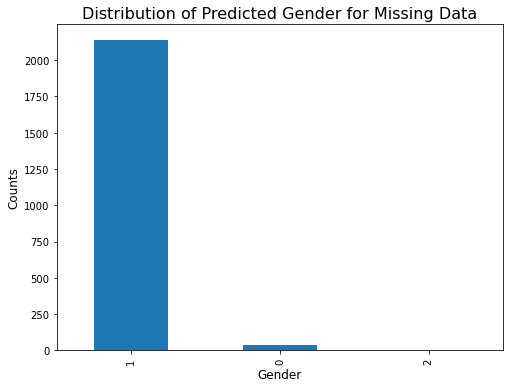

In [128]:
# Distribution of predicted genders
fig, ax = plt.subplots(figsize=(8,6));
missing_gender_data.gender.value_counts().plot(kind='bar', ax=ax)
ax.set_title("Distribution of Predicted Gender for Missing Data", fontsize=16)
ax.set_xlabel("Gender", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [130]:
available_gender_data[other_column] = available_gender_data_other_data
missing_gender_data[other_column] = missing_gender_data_other_data
all_data = pd.concat([missing_gender_data, available_gender_data])


In [138]:
# verifying that the data is correct
all_data_actual = pd.read_csv("all_data.csv")
p_ids = all_data_actual[all_data_actual['gender_old'].isnull()]['p_id']
all_data[all_data['p_id'].isin(p_ids)]

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,income,age,gender_old,p_id
0,1,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,4.0,4.0,5.0,37.57,11.750000,8.500000,NaN,NaN,NaN,6961
2,1,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,2.0,2.0,0.0,2.14,2.500000,5.000000,NaN,NaN,NaN,3746
4,1,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,6.0,6.0,0.0,2.30,13.333333,7.833333,NaN,NaN,NaN,10735
6,1,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,6.0,6.0,0.0,0.00,8.333333,7.666667,NaN,NaN,NaN,9524
7,1,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,5.0,5.0,0.0,0.24,8.400000,6.600000,NaN,NaN,NaN,6939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16980,1,2016,9,1,25.25,5.0,1.0,0.0,0.0,5.000000,...,5.0,5.0,5.0,52.95,8.400000,6.400000,NaN,NaN,NaN,6128
16982,1,2016,4,15,31.02,5.0,0.0,2.0,0.0,10.000000,...,4.0,4.0,5.0,34.74,9.250000,7.750000,NaN,NaN,NaN,14483
16989,1,2018,3,5,0.76,0.0,0.0,0.0,0.0,5.000000,...,6.0,6.0,0.0,1.52,6.000000,6.166667,NaN,NaN,NaN,13480
16991,1,2016,1,16,21.88,0.0,0.0,0.0,0.0,10.000000,...,4.0,4.0,0.0,19.78,5.000000,5.250000,NaN,NaN,NaN,11374


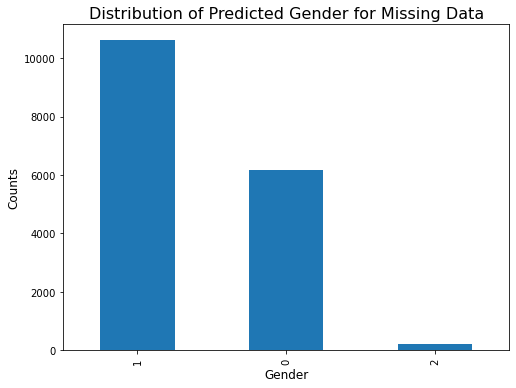

In [139]:
# Distribution of predicted genders
fig, ax = plt.subplots(figsize=(8,6));
all_data.gender.value_counts().plot(kind='bar', ax=ax)
ax.set_title("Distribution of Predicted Gender for Missing Data", fontsize=16)
ax.set_xlabel("Gender", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);


In [140]:
all_data.to_csv("all_cleaned_data.csv",index=False)

## 1.2 Clean up Age Data

In [228]:
all_data = pd.read_csv("all_cleaned_data.csv")
all_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,income,age,gender_old,p_id
0,1,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,4.0,4.0,5.0,37.57,11.750000,8.500000,NaN,NaN,NaN,6961
1,1,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,2.0,2.0,0.0,2.14,2.500000,5.000000,NaN,NaN,NaN,3746
2,1,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,6.0,6.0,0.0,2.30,13.333333,7.833333,NaN,NaN,NaN,10735
3,1,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,6.0,6.0,0.0,0.00,8.333333,7.666667,NaN,NaN,NaN,9524
4,1,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,5.0,5.0,0.0,0.24,8.400000,6.600000,NaN,NaN,NaN,6939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,2018,6,4,20.03,0.0,0.0,0.0,0.0,10.000000,...,3.0,3.0,0.0,6.76,5.666667,5.000000,54000.0,45.0,F,7264
16996,1,2018,7,13,25.97,5.0,1.0,0.0,0.0,5.000000,...,3.0,3.0,5.0,6.46,1.666667,4.666667,72000.0,61.0,M,2887
16997,1,2017,1,26,39.74,0.0,0.0,0.0,0.0,0.000000,...,3.0,3.0,0.0,30.11,6.666667,5.666667,73000.0,49.0,M,105
16998,0,2016,3,7,189.67,25.0,1.0,0.0,0.0,10.000000,...,1.0,1.0,10.0,57.50,10.000000,5.000000,50000.0,83.0,F,10567


### 1.2.1 Predicting Missing Age Data

In [229]:
available_age_data = all_data[all_data['age'].notnull()]
missing_age_data = all_data[all_data['age'].isnull()]
available_age_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,income,age,gender_old,p_id
2175,0,2017,7,15,77.01,5.0,1.0,0.0,0.0,5.0,...,2.0,2.0,5.0,46.44,2.500000,5.500000,112000.0,55.0,F,398
2176,0,2017,5,9,159.27,20.0,2.0,0.0,0.0,7.5,...,3.0,3.0,15.0,135.34,5.000000,5.666667,100000.0,75.0,F,7996
2177,1,2018,4,26,57.73,7.0,1.0,1.0,0.0,5.0,...,4.0,4.0,7.0,36.84,6.250000,7.000000,70000.0,68.0,M,15043
2178,1,2018,2,9,36.43,19.0,3.0,2.0,0.0,5.0,...,5.0,5.0,19.0,63.32,7.000000,6.800000,53000.0,65.0,M,3728
2179,1,2017,11,11,15.62,2.0,0.0,1.0,0.0,0.0,...,3.0,3.0,2.0,15.62,5.666667,7.000000,51000.0,58.0,M,3059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,2018,6,4,20.03,0.0,0.0,0.0,0.0,10.0,...,3.0,3.0,0.0,6.76,5.666667,5.000000,54000.0,45.0,F,7264
16996,1,2018,7,13,25.97,5.0,1.0,0.0,0.0,5.0,...,3.0,3.0,5.0,6.46,1.666667,4.666667,72000.0,61.0,M,2887
16997,1,2017,1,26,39.74,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,0.0,30.11,6.666667,5.666667,73000.0,49.0,M,105
16998,0,2016,3,7,189.67,25.0,1.0,0.0,0.0,10.0,...,1.0,1.0,10.0,57.50,10.000000,5.000000,50000.0,83.0,F,10567


In [230]:
missing_age_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,income,age,gender_old,p_id
0,1,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,4.0,4.0,5.0,37.57,11.750000,8.500000,NaN,NaN,NaN,6961
1,1,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,2.0,2.0,0.0,2.14,2.500000,5.000000,NaN,NaN,NaN,3746
2,1,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,6.0,6.0,0.0,2.30,13.333333,7.833333,NaN,NaN,NaN,10735
3,1,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,6.0,6.0,0.0,0.00,8.333333,7.666667,NaN,NaN,NaN,9524
4,1,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,5.0,5.0,0.0,0.24,8.400000,6.600000,NaN,NaN,NaN,6939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,1,2016,9,1,25.25,5.0,1.0,0.0,0.0,5.000000,...,5.0,5.0,5.0,52.95,8.400000,6.400000,NaN,NaN,NaN,6128
2171,1,2016,4,15,31.02,5.0,0.0,2.0,0.0,10.000000,...,4.0,4.0,5.0,34.74,9.250000,7.750000,NaN,NaN,NaN,14483
2172,1,2018,3,5,0.76,0.0,0.0,0.0,0.0,5.000000,...,6.0,6.0,0.0,1.52,6.000000,6.166667,NaN,NaN,NaN,13480
2173,1,2016,1,16,21.88,0.0,0.0,0.0,0.0,10.000000,...,4.0,4.0,0.0,19.78,5.000000,5.250000,NaN,NaN,NaN,11374


In [231]:
#store irrelevant data for later 
other_column = ['income', 'gender_old', 'p_id']
available_age_data_other_data = available_age_data[other_column]
missing_age_data_other_data = missing_age_data[other_column]
available_age_data_other_data

,income,gender_old,p_id
2175,112000.0,F,398
2176,100000.0,F,7996
2177,70000.0,M,15043
2178,53000.0,M,3728
2179,51000.0,M,3059
...,...,...,...
16995,54000.0,F,7264
16996,72000.0,M,2887
16997,73000.0,M,105
16998,50000.0,F,10567


In [232]:
missing_age_data_other_data

,income,gender_old,p_id
0,NaN,NaN,6961
1,NaN,NaN,3746
2,NaN,NaN,10735
3,NaN,NaN,9524
4,NaN,NaN,6939
...,...,...,...
2170,NaN,NaN,6128
2171,NaN,NaN,14483
2172,NaN,NaN,13480
2173,NaN,NaN,11374


In [233]:
available_age_data = available_age_data.drop(other_column, axis='columns')
missing_age_data = missing_age_data.drop(other_column, axis='columns')
available_age_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age
2175,0,2017,7,15,77.01,5.0,1.0,0.0,0.0,5.0,...,1.0,2.0,2.0,2.0,2.0,5.0,46.44,2.500000,5.500000,55.0
2176,0,2017,5,9,159.27,20.0,2.0,0.0,0.0,7.5,...,2.0,3.0,3.0,3.0,3.0,15.0,135.34,5.000000,5.666667,75.0
2177,1,2018,4,26,57.73,7.0,1.0,1.0,0.0,5.0,...,2.0,4.0,4.0,4.0,4.0,7.0,36.84,6.250000,7.000000,68.0
2178,1,2018,2,9,36.43,19.0,3.0,2.0,0.0,5.0,...,5.0,5.0,5.0,5.0,5.0,19.0,63.32,7.000000,6.800000,65.0
2179,1,2017,11,11,15.62,2.0,0.0,1.0,0.0,0.0,...,1.0,3.0,3.0,3.0,3.0,2.0,15.62,5.666667,7.000000,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,2018,6,4,20.03,0.0,0.0,0.0,0.0,10.0,...,0.0,3.0,3.0,3.0,3.0,0.0,6.76,5.666667,5.000000,45.0
16996,1,2018,7,13,25.97,5.0,1.0,0.0,0.0,5.0,...,1.0,3.0,3.0,3.0,3.0,5.0,6.46,1.666667,4.666667,61.0
16997,1,2017,1,26,39.74,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,3.0,3.0,3.0,0.0,30.11,6.666667,5.666667,49.0
16998,0,2016,3,7,189.67,25.0,1.0,0.0,0.0,10.0,...,1.0,1.0,1.0,1.0,1.0,10.0,57.50,10.000000,5.000000,83.0


In [234]:
missing_age_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age
0,1,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,2.0,4.0,4.0,4.0,4.0,5.0,37.57,11.750000,8.500000,NaN
1,1,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,0.0,2.0,2.0,2.0,2.0,0.0,2.14,2.500000,5.000000,NaN
2,1,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,0.0,6.0,6.0,6.0,6.0,0.0,2.30,13.333333,7.833333,NaN
3,1,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,0.0,6.0,6.0,6.0,6.0,0.0,0.00,8.333333,7.666667,NaN
4,1,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,0.0,5.0,5.0,5.0,5.0,0.0,0.24,8.400000,6.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,1,2016,9,1,25.25,5.0,1.0,0.0,0.0,5.000000,...,1.0,5.0,5.0,5.0,5.0,5.0,52.95,8.400000,6.400000,NaN
2171,1,2016,4,15,31.02,5.0,0.0,2.0,0.0,10.000000,...,2.0,4.0,4.0,4.0,4.0,5.0,34.74,9.250000,7.750000,NaN
2172,1,2018,3,5,0.76,0.0,0.0,0.0,0.0,5.000000,...,0.0,6.0,6.0,6.0,6.0,0.0,1.52,6.000000,6.166667,NaN
2173,1,2016,1,16,21.88,0.0,0.0,0.0,0.0,10.000000,...,0.0,4.0,4.0,4.0,4.0,0.0,19.78,5.000000,5.250000,NaN


In [235]:
ss = StandardScaler()
collist = available_age_data.columns.tolist()
collist.remove('age')
available_age_data_scaled =available_age_data.copy(deep=True)
available_age_data_scaled[collist] = ss.fit_transform(available_age_data_scaled[collist])
missing_age_data_scaled =missing_age_data.copy(deep=True)
missing_age_data_scaled[collist] = ss.transform(missing_age_data_scaled[collist])
available_age_data_scaled

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age
2175,-1.159778,0.317000,0.087257,-0.103348,-0.307925,-0.628148,0.118484,-0.916214,0.0,-0.421626,...,-0.607078,-1.535989,-1.535989,-1.535989,-1.535989,-0.506165,-0.459364,-1.690426,-0.769882,55.0
2176,-1.159778,0.317000,-0.486016,-0.789276,0.325036,0.988271,1.097046,-0.916214,0.0,0.337557,...,0.027972,-0.858521,-0.858521,-0.858521,-0.858521,0.620022,0.049236,-0.855777,-0.633531,75.0
2177,0.770364,1.151582,-0.772653,1.154186,-0.456278,-0.412626,0.118484,-0.065530,0.0,-0.421626,...,0.027972,-0.181054,-0.181054,-0.181054,-0.181054,-0.280927,-0.514285,-0.438453,0.457279,68.0
2178,0.770364,1.151582,-1.345927,-0.789276,-0.620174,0.880509,2.075609,0.785154,0.0,-0.421626,...,1.933123,0.496413,0.496413,0.496413,0.496413,1.070496,-0.362793,-0.188058,0.293657,65.0
2179,0.770364,0.317000,1.233805,-0.560633,-0.780299,-0.951432,-0.860079,-0.065530,0.0,-1.939993,...,-0.607078,-0.858521,-0.858521,-0.858521,-0.858521,-0.844021,-0.635686,-0.633204,0.457279,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-1.159778,1.151582,-0.199379,-1.360882,-0.746366,-1.166954,-0.860079,-0.916214,0.0,1.096740,...,-1.242129,-0.858521,-0.858521,-0.858521,-0.858521,-1.069258,-0.686374,-0.633204,-1.178935,45.0
16996,0.770364,1.151582,0.087257,-0.331991,-0.700660,-0.628148,0.118484,-0.916214,0.0,-0.421626,...,-0.607078,-0.858521,-0.858521,-0.858521,-0.858521,-0.506165,-0.688090,-1.968642,-1.451637,61.0
16997,0.770364,0.317000,-1.632563,1.154186,-0.594704,-1.166954,-0.860079,-0.916214,0.0,-1.939993,...,-1.242129,-0.858521,-0.858521,-0.858521,-0.858521,-1.069258,-0.552788,-0.299344,-0.633531,49.0
16998,-1.159778,-0.517582,-1.059290,-1.017918,0.558953,1.527077,0.118484,-0.916214,0.0,1.096740,...,-0.607078,-2.213456,-2.213456,-2.213456,-2.213456,0.056928,-0.396089,0.813521,-1.178935,83.0


In [236]:
missing_age_data_scaled

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age
0,0.770364,0.317000,-1.345927,-0.446312,-0.743519,-0.628148,-0.860079,0.785154,0.0,-1.939993,...,0.027972,-0.181054,-0.181054,-0.181054,-0.181054,-0.506165,-0.510109,1.397775,1.684439,NaN
1,0.770364,1.151582,0.087257,-0.446312,-0.790456,-1.166954,-0.860079,-0.916214,0.0,-0.421626,...,-1.242129,-1.535989,-1.535989,-1.535989,-1.535989,-1.069258,-0.712805,-1.690426,-1.178935,NaN
2,0.770364,0.317000,0.373894,-1.360882,-0.864709,-1.166954,-0.860079,-0.916214,0.0,-1.939993,...,-1.242129,1.173881,1.173881,1.173881,1.173881,-1.069258,-0.711890,1.926386,1.139034,NaN
3,0.770364,0.317000,0.660531,1.039865,-0.900489,-1.166954,-0.860079,-0.916214,0.0,1.096740,...,-1.242129,1.173881,1.173881,1.173881,1.173881,-1.069258,-0.725048,0.257088,1.002683,NaN
4,0.770364,0.317000,0.947168,-1.589525,-0.898643,-1.166954,-0.860079,-0.916214,0.0,0.590618,...,-1.242129,0.496413,0.496413,0.496413,0.496413,-1.069258,-0.723675,0.279346,0.130036,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,0.770364,-0.517582,0.660531,-1.703846,-0.706200,-0.628148,0.118484,-0.916214,0.0,-0.421626,...,-0.607078,0.496413,0.496413,0.496413,0.496413,-0.506165,-0.422120,0.279346,-0.033586,NaN
2171,0.770364,-0.517582,-0.772653,-0.103348,-0.661802,-0.628148,-0.860079,0.785154,0.0,1.096740,...,0.027972,-0.181054,-0.181054,-0.181054,-0.181054,-0.506165,-0.526300,0.563126,1.070859,NaN
2172,0.770364,1.151582,-1.059290,-1.246561,-0.894641,-1.166954,-0.860079,-0.916214,0.0,-0.421626,...,-1.242129,1.173881,1.173881,1.173881,1.173881,-1.069258,-0.716352,-0.521917,-0.224477,NaN
2173,0.770364,-0.517582,-1.632563,0.010973,-0.732131,-1.166954,-0.860079,-0.916214,0.0,1.096740,...,-1.242129,-0.181054,-0.181054,-0.181054,-0.181054,-1.069258,-0.611886,-0.855777,-0.974408,NaN


In [237]:
train, test = train_test_split(available_age_data_scaled, test_size=0.1, random_state=41)
X_train = train.drop(['age'], axis='columns')
y_train = train['age']

X_test = test.drop(['age'], axis='columns')
y_test = test['age']

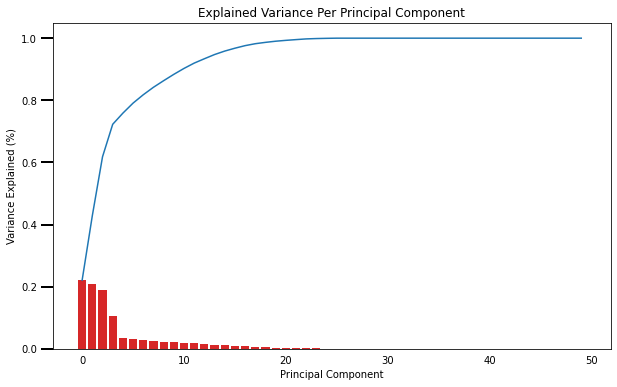

In [238]:
pca, X_train_pca_0 = do_pca(X_train)
scree_plot(pca)

In [239]:
n_components = 25
pca, X_train_pca = do_pca(X_train, n_components)
X_train_actual = X_train
X_train = X_train_pca
X_train.head()
X_train_actual = X_train
X_train = X_train_pca
X_train.head()


,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24
4644,-1.264692,0.415995,-0.158250,0.036172,-0.447370,0.558045,0.115009,0.038726,-0.910170,-0.730746,...,0.029116,-0.011100,-0.545106,0.227097,0.038501,-0.567759,-0.152319,0.054698,-0.029084,0.189209
7915,-2.615509,-2.720409,7.398942,0.781173,0.000636,-0.467887,-1.404989,-1.868294,-0.828727,1.387997,...,-0.222033,0.461626,0.745040,0.104120,0.592689,0.241711,0.348140,0.203311,-0.123158,-0.178167
11368,-2.321433,-0.212979,-0.724999,-0.323679,-0.668151,-0.742664,0.023115,-0.322509,0.495784,0.510268,...,0.689549,0.853978,0.099982,0.141098,-0.022334,0.038355,0.094763,0.205155,-0.146335,0.266106
12247,4.386117,0.955433,1.446956,2.123218,0.745138,0.314404,1.033123,0.334897,1.160850,0.659257,...,-0.179382,-0.191743,-0.276632,-0.219525,-0.496704,0.201416,0.076010,0.201534,0.120435,0.190647
12410,6.958813,-1.665004,2.576542,2.338146,1.506019,1.252576,0.152855,-1.232601,0.895183,0.787510,...,0.793861,-0.443421,-0.143255,-0.032455,-0.229106,-0.739593,-0.249572,0.002465,0.019874,-0.062428


In [240]:
X_test_pca = pd.DataFrame(pca.transform(X_test))
X_test_pca.columns = ["pca_comp_" + str(i) for i in range(n_components)]
X_test_pca.index = X_test.index
X_test_actual = X_test
X_test = X_test_pca
X_test

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24
3637,-0.961745,1.614607,-0.579638,2.499271,-0.423062,0.851583,-0.276088,-0.326768,-0.614368,-0.588923,...,0.562232,-0.072771,0.300321,0.150987,0.189982,-0.406549,-0.165433,0.158731,0.045831,0.124098
8030,6.867772,0.795466,-0.724124,1.081823,0.291407,-1.755519,1.324620,0.179550,-1.458820,-0.569099,...,-0.642277,0.401759,-0.098000,-0.130552,-0.062201,0.038007,0.091801,-0.961116,-0.255737,0.170483
2520,-0.867973,2.445091,1.607319,2.345645,-2.513941,0.509676,1.769841,0.217239,1.076421,0.635898,...,-0.256619,0.438206,-0.115615,-0.140745,-0.350205,0.709312,-0.340646,0.271833,0.131362,-0.075935
2274,-1.647770,0.714614,-0.438699,-0.022410,-0.535271,-0.504965,-0.784715,0.488998,-0.867873,-0.814166,...,0.027138,-0.667320,0.223110,0.413545,0.019356,-0.019616,-0.165510,0.133530,-0.146691,-0.170890
3463,-3.895135,4.365941,-4.841678,1.171814,1.256073,-1.223214,-0.872610,-0.920057,1.210631,0.946458,...,0.635808,-0.022137,-0.223928,-0.492697,0.106022,0.258868,-0.261409,0.141088,0.109088,-0.163121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,-0.395074,-1.955774,7.999938,-0.092384,-1.366529,-0.129161,-1.795882,-2.284062,-0.578031,-0.584821,...,0.003311,0.408734,0.307251,0.109961,0.637084,-0.072925,0.324279,0.034854,-0.134294,-0.119415
12771,-2.685020,1.020939,0.322735,-3.355846,0.158020,0.990116,-0.721706,-0.235789,-0.432812,0.529668,...,-0.030954,0.126243,-0.227983,-0.062223,-0.316269,-0.153929,-0.611282,-0.093781,0.124892,-0.127064
6473,3.072877,2.089032,-2.066300,0.608393,-0.229847,-1.010409,-0.756884,0.366257,-0.638810,-0.870972,...,-0.205171,1.158932,0.389069,-0.096203,0.060168,-0.545295,-0.303913,-0.119057,0.109545,-0.031204
6875,1.197869,-1.379857,0.364002,-0.634518,-0.585630,-0.212740,0.449222,1.667959,-1.656941,-0.226130,...,-0.057978,-0.122970,-0.972178,0.142068,0.829634,-0.347690,0.267339,-0.051629,-0.052088,-0.010756


In [249]:
X_predict = missing_age_data_scaled.drop('age', axis='columns')
X_predict_pca = pd.DataFrame(pca.transform(X_predict))
X_predict_pca.columns = ["pca_comp_" + str(i) for i in range(n_components)]
X_predict_pca.index = X_predict.index
X_predict_actual = X_predict
X_predict = X_predict_pca
X_predict

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24
0,5.967189,-3.535348,0.077233,-1.528460,1.164316,-1.051343,-1.163861,-1.592995,0.491291,0.879916,...,-0.068419,-0.300911,-0.489853,0.126453,0.238197,0.444290,0.043108,0.226050,-0.125632,-0.067690
1,-4.871533,-3.905128,-0.772052,-0.256998,2.099978,-0.470391,-0.628768,1.106361,0.559357,0.222995,...,-0.330733,0.414085,-0.342613,0.506083,-0.802053,0.020303,0.186370,-0.148264,0.270487,-0.317825
2,4.447987,-2.227768,4.892655,-2.857448,-1.041269,-0.114412,-0.120613,-1.849631,1.224149,0.293062,...,0.799536,-1.245248,-0.953047,-0.161805,0.078106,1.231022,0.464160,0.493322,-0.393301,-0.037749
3,3.535322,0.019190,2.970673,-3.842294,0.420421,-0.506143,0.079118,1.498958,-1.071756,0.513360,...,0.649497,-1.129554,-0.618267,-0.155262,0.072015,0.091184,-0.316703,-0.002306,0.127999,0.401778
4,-0.025901,1.240355,-1.533820,-4.277977,1.191633,0.544400,0.679794,0.349778,1.548854,-0.450353,...,0.093535,0.274489,0.319885,-0.164559,0.190967,0.557039,-0.336073,0.116093,0.111601,0.036699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,1.701398,-0.777267,1.244770,-1.722281,-0.152362,-0.423615,0.482083,0.151132,1.661295,0.037950,...,0.869727,-0.102477,0.251215,0.124120,-0.202118,0.387982,0.592957,0.055177,-0.083061,0.173499
2171,3.377626,-1.602197,-1.139966,-1.730312,0.605316,-0.718405,-0.235289,2.024662,0.317678,0.608927,...,-0.442200,0.507710,-0.020938,-0.019118,0.462651,0.341062,-0.376529,0.270038,-0.050815,0.044143
2172,2.981935,-0.176304,3.387347,-3.677732,1.693155,-0.852761,-1.826454,0.438417,0.996102,0.113417,...,0.627496,-0.532522,-0.053454,-0.121534,-0.721915,0.546400,-0.093356,-0.131850,0.225438,0.050492
2173,-5.084459,-1.212275,1.178297,-1.023562,1.193650,0.073578,-0.585483,1.767376,0.235281,0.735390,...,0.070289,0.155681,-0.559191,-0.064274,0.754147,0.684134,-0.567472,0.472940,-0.110922,0.088037


In [242]:
from sklearn.metrics import r2_score, mean_squared_error

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    results = {}

    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[0:sample_size], y_train[0:sample_size])
    end = time() # Get end time

    # TODO: Calculate the training time
    results['train_time'] = end - start

    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[0:sample_size])
    end = time() # Get end time

    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start

    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['r2_train'] = r2_score(y_train[0:sample_size], predictions_train[0:sample_size])
    results['rmse_train'] = mean_squared_error(y_train[0:sample_size], predictions_train[0:sample_size], squared=False)

    # TODO: Compute F-score on the test set which is y_test
    results['r2_test'] = r2_score(y_test, predictions_test)
    results['rmse_test'] = mean_squared_error(y_test, predictions_test, squared=False)

    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    # Return the results
    return results

In [243]:
!pip install xgboost

In [244]:
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()
      - r2: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 2, figsize = (11,8))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'rmse_train', 'pred_time', 'rmse_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//2, j%2].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//2, j%2].set_xticks([0.45, 1.45, 2.45])
                ax[j//2, j%2].set_xticklabels(["1%", "10%", "100%"])
                ax[j//2, j%2].set_xlabel("Training Set Size")
                ax[j//2, j%2].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("R2-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("R2-score")
    
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("R2 on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("R2 on Testing Set")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 50))
    ax[1, 1].set_ylim((0, 50))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (0, -0.5), \
               loc = 'upper center', borderaxespad = 0., ncol = 1, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, x = 0.63, y = 1.05)
    # Tune the subplot layout
    # Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html for more details on the arguments
    plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
    plt.tight_layout()
    plt.show()

AdaBoostRegressor trained on 133 samples.
AdaBoostRegressor trained on 1334 samples.
AdaBoostRegressor trained on 13342 samples.
XGBRegressor trained on 133 samples.
XGBRegressor trained on 1334 samples.
XGBRegressor trained on 13342 samples.
Lasso trained on 133 samples.
Lasso trained on 1334 samples.
Lasso trained on 13342 samples.


<IPython.core.display.JSON object>

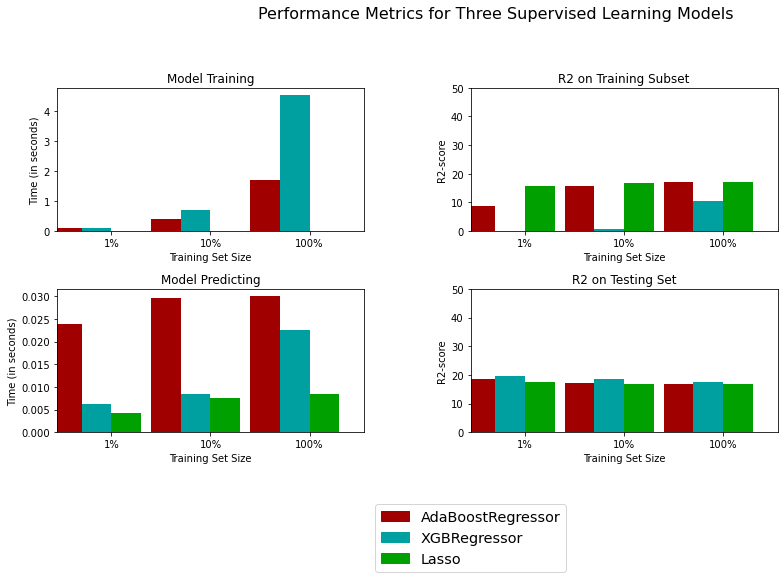

In [245]:
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVR
from time import time
from IPython.display import display, JSON

random_state = 88
clf_A = AdaBoostRegressor(random_state=random_state)
clf_B = XGBRegressor(random_state=random_state)
clf_C = Lasso(random_state=random_state)


samples_100 = len(y_train)
samples_10 = round(0.1*len(y_train))
samples_1 = round(0.01*len(y_train))


results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
display(JSON(results))
evaluate(results)

In [246]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

# TODO: Initialize the classifier
clf = AdaBoostRegressor(random_state=random_state)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
#parameters = {'var_smoothing': np.logspace(20,-20, num=100)}
#parameters = {"n_estimators": list(range(90,100))}
parameters = {"learning_rate": np.logspace(0,1, num=5), 'n_estimators': [110,112]}


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(r2_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("RMSE on testing data: {:.4f}".format(mean_squared_error(y_test, predictions, squared=False)))
print("\nOptimized Model\n------")
print("Final RMSE on the testing data: {:.4f}".format(mean_squared_error(y_test, best_predictions, squared=False)))

Unoptimized model
------
RMSE on testing data: 16.7330

Optimized Model
------
Final RMSE on the testing data: 16.7174


In [247]:
age_predictor = best_clf

In [252]:
missing_age_data['age']=age_predictor.predict(X_predict)
missing_age_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_offer_completed,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age
0,1,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,2.0,4.0,4.0,4.0,4.0,5.0,37.57,11.750000,8.500000,51.12317
1,1,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,0.0,2.0,2.0,2.0,2.0,0.0,2.14,2.500000,5.000000,51.12317
2,1,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,0.0,6.0,6.0,6.0,6.0,0.0,2.30,13.333333,7.833333,51.12317
3,1,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,0.0,6.0,6.0,6.0,6.0,0.0,0.00,8.333333,7.666667,51.12317
4,1,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,0.0,5.0,5.0,5.0,5.0,0.0,0.24,8.400000,6.600000,51.12317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,1,2016,9,1,25.25,5.0,1.0,0.0,0.0,5.000000,...,1.0,5.0,5.0,5.0,5.0,5.0,52.95,8.400000,6.400000,51.12317
2171,1,2016,4,15,31.02,5.0,0.0,2.0,0.0,10.000000,...,2.0,4.0,4.0,4.0,4.0,5.0,34.74,9.250000,7.750000,51.12317
2172,1,2018,3,5,0.76,0.0,0.0,0.0,0.0,5.000000,...,0.0,6.0,6.0,6.0,6.0,0.0,1.52,6.000000,6.166667,51.12317
2173,1,2016,1,16,21.88,0.0,0.0,0.0,0.0,10.000000,...,0.0,4.0,4.0,4.0,4.0,0.0,19.78,5.000000,5.250000,51.12317


In [253]:
#Function to visualize the data
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
def distribution(data, features):
    """
    Visualization code for displaying skewed distributions of features
    """ 
    
    fig = pl.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(features):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000, 2500])
        ax.set_yticklabels([0, 500, 1000, 1500, 2000, ">2500"])

    fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
        fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

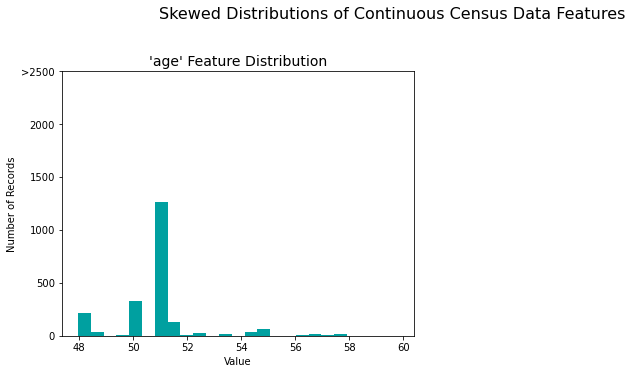

In [256]:
distribution(missing_age_data, ['age'])

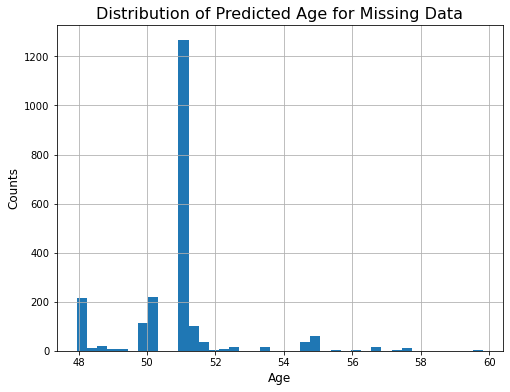

In [258]:
fig, ax = plt.subplots(figsize=(8,6));
missing_age_data.age.hist(bins=40, ax=ax)
ax.set_title("Distribution of Predicted Age for Missing Data", fontsize=16)
ax.set_xlabel("Age", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

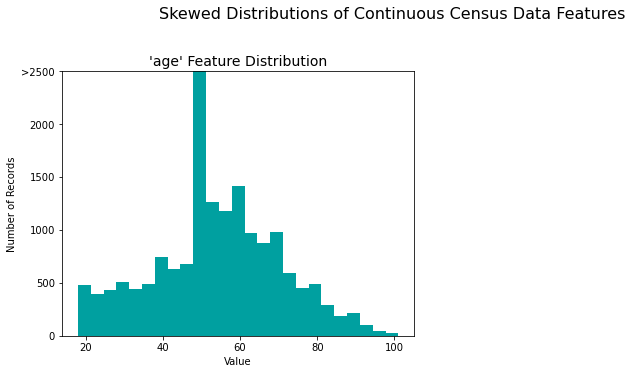

In [255]:
available_age_data[other_column] = available_age_data_other_data
missing_age_data[other_column] = missing_age_data_other_data
all_age_data = pd.concat([missing_age_data, available_age_data])
distribution(all_age_data, ['age'])

### 1.2.2 Discussion on Age Prediction

The model had RMSE of `16.7174` which not so good but our data is mostly made up of derived features and it won't be possible to get a better prediction from any model. But still these predictions are atleast better than hard coding value or just dropping the data row. If we had more features and more data we would be able to get a better prediction model

In [259]:
all_age_data.to_csv("all_cleaned_data.csv",index=False)

# 1.3 Clean up Income Data

In [278]:
all_data = pd.read_csv("all_cleaned_data.csv")
all_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age,income,gender_old,p_id
0,1,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,4.0,4.0,5.0,37.57,11.750000,8.500000,51.12317,NaN,NaN,6961
1,1,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,2.0,2.0,0.0,2.14,2.500000,5.000000,51.12317,NaN,NaN,3746
2,1,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,6.0,6.0,0.0,2.30,13.333333,7.833333,51.12317,NaN,NaN,10735
3,1,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,6.0,6.0,0.0,0.00,8.333333,7.666667,51.12317,NaN,NaN,9524
4,1,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,5.0,5.0,0.0,0.24,8.400000,6.600000,51.12317,NaN,NaN,6939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,2018,6,4,20.03,0.0,0.0,0.0,0.0,10.000000,...,3.0,3.0,0.0,6.76,5.666667,5.000000,45.00000,54000.0,F,7264
16996,1,2018,7,13,25.97,5.0,1.0,0.0,0.0,5.000000,...,3.0,3.0,5.0,6.46,1.666667,4.666667,61.00000,72000.0,M,2887
16997,1,2017,1,26,39.74,0.0,0.0,0.0,0.0,0.000000,...,3.0,3.0,0.0,30.11,6.666667,5.666667,49.00000,73000.0,M,105
16998,0,2016,3,7,189.67,25.0,1.0,0.0,0.0,10.000000,...,1.0,1.0,10.0,57.50,10.000000,5.000000,83.00000,50000.0,F,10567


# 1.3.1 Predict Income

In [279]:
available_income_data = all_data[all_data['income'].notnull()]
missing_income_data = all_data[all_data['income'].isnull()]
display(available_income_data)
missing_income_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age,income,gender_old,p_id
2175,0,2017,7,15,77.01,5.0,1.0,0.0,0.0,5.0,...,2.0,2.0,5.0,46.44,2.500000,5.500000,55.0,112000.0,F,398
2176,0,2017,5,9,159.27,20.0,2.0,0.0,0.0,7.5,...,3.0,3.0,15.0,135.34,5.000000,5.666667,75.0,100000.0,F,7996
2177,1,2018,4,26,57.73,7.0,1.0,1.0,0.0,5.0,...,4.0,4.0,7.0,36.84,6.250000,7.000000,68.0,70000.0,M,15043
2178,1,2018,2,9,36.43,19.0,3.0,2.0,0.0,5.0,...,5.0,5.0,19.0,63.32,7.000000,6.800000,65.0,53000.0,M,3728
2179,1,2017,11,11,15.62,2.0,0.0,1.0,0.0,0.0,...,3.0,3.0,2.0,15.62,5.666667,7.000000,58.0,51000.0,M,3059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,2018,6,4,20.03,0.0,0.0,0.0,0.0,10.0,...,3.0,3.0,0.0,6.76,5.666667,5.000000,45.0,54000.0,F,7264
16996,1,2018,7,13,25.97,5.0,1.0,0.0,0.0,5.0,...,3.0,3.0,5.0,6.46,1.666667,4.666667,61.0,72000.0,M,2887
16997,1,2017,1,26,39.74,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,0.0,30.11,6.666667,5.666667,49.0,73000.0,M,105
16998,0,2016,3,7,189.67,25.0,1.0,0.0,0.0,10.0,...,1.0,1.0,10.0,57.50,10.000000,5.000000,83.0,50000.0,F,10567


,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age,income,gender_old,p_id
0,1,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,4.0,4.0,5.0,37.57,11.750000,8.500000,51.12317,NaN,NaN,6961
1,1,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,2.0,2.0,0.0,2.14,2.500000,5.000000,51.12317,NaN,NaN,3746
2,1,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,6.0,6.0,0.0,2.30,13.333333,7.833333,51.12317,NaN,NaN,10735
3,1,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,6.0,6.0,0.0,0.00,8.333333,7.666667,51.12317,NaN,NaN,9524
4,1,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,5.0,5.0,0.0,0.24,8.400000,6.600000,51.12317,NaN,NaN,6939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,1,2016,9,1,25.25,5.0,1.0,0.0,0.0,5.000000,...,5.0,5.0,5.0,52.95,8.400000,6.400000,51.12317,NaN,NaN,6128
2171,1,2016,4,15,31.02,5.0,0.0,2.0,0.0,10.000000,...,4.0,4.0,5.0,34.74,9.250000,7.750000,51.12317,NaN,NaN,14483
2172,1,2018,3,5,0.76,0.0,0.0,0.0,0.0,5.000000,...,6.0,6.0,0.0,1.52,6.000000,6.166667,51.12317,NaN,NaN,13480
2173,1,2016,1,16,21.88,0.0,0.0,0.0,0.0,10.000000,...,4.0,4.0,0.0,19.78,5.000000,5.250000,51.12317,NaN,NaN,11374


In [280]:
#store irrelevant data for later 
other_column = ['gender_old', 'p_id']
available_income_data_other_data = available_income_data[other_column]
missing_income_data_other_data = missing_income_data[other_column]
available_income_data_other_data

,gender_old,p_id
2175,F,398
2176,F,7996
2177,M,15043
2178,M,3728
2179,M,3059
...,...,...
16995,F,7264
16996,M,2887
16997,M,105
16998,F,10567


In [281]:
available_income_data = available_income_data.drop(other_column, axis='columns')
missing_income_data = missing_income_data.drop(other_column, axis='columns')
display(available_income_data)
missing_income_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age,income
2175,0,2017,7,15,77.01,5.0,1.0,0.0,0.0,5.0,...,2.0,2.0,2.0,2.0,5.0,46.44,2.500000,5.500000,55.0,112000.0
2176,0,2017,5,9,159.27,20.0,2.0,0.0,0.0,7.5,...,3.0,3.0,3.0,3.0,15.0,135.34,5.000000,5.666667,75.0,100000.0
2177,1,2018,4,26,57.73,7.0,1.0,1.0,0.0,5.0,...,4.0,4.0,4.0,4.0,7.0,36.84,6.250000,7.000000,68.0,70000.0
2178,1,2018,2,9,36.43,19.0,3.0,2.0,0.0,5.0,...,5.0,5.0,5.0,5.0,19.0,63.32,7.000000,6.800000,65.0,53000.0
2179,1,2017,11,11,15.62,2.0,0.0,1.0,0.0,0.0,...,3.0,3.0,3.0,3.0,2.0,15.62,5.666667,7.000000,58.0,51000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,2018,6,4,20.03,0.0,0.0,0.0,0.0,10.0,...,3.0,3.0,3.0,3.0,0.0,6.76,5.666667,5.000000,45.0,54000.0
16996,1,2018,7,13,25.97,5.0,1.0,0.0,0.0,5.0,...,3.0,3.0,3.0,3.0,5.0,6.46,1.666667,4.666667,61.0,72000.0
16997,1,2017,1,26,39.74,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,0.0,30.11,6.666667,5.666667,49.0,73000.0
16998,0,2016,3,7,189.67,25.0,1.0,0.0,0.0,10.0,...,1.0,1.0,1.0,1.0,10.0,57.50,10.000000,5.000000,83.0,50000.0


,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age,income
0,1,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,4.0,4.0,4.0,4.0,5.0,37.57,11.750000,8.500000,51.12317,NaN
1,1,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,2.0,2.0,2.0,2.0,0.0,2.14,2.500000,5.000000,51.12317,NaN
2,1,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,6.0,6.0,6.0,6.0,0.0,2.30,13.333333,7.833333,51.12317,NaN
3,1,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,6.0,6.0,6.0,6.0,0.0,0.00,8.333333,7.666667,51.12317,NaN
4,1,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,5.0,5.0,5.0,5.0,0.0,0.24,8.400000,6.600000,51.12317,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,1,2016,9,1,25.25,5.0,1.0,0.0,0.0,5.000000,...,5.0,5.0,5.0,5.0,5.0,52.95,8.400000,6.400000,51.12317,NaN
2171,1,2016,4,15,31.02,5.0,0.0,2.0,0.0,10.000000,...,4.0,4.0,4.0,4.0,5.0,34.74,9.250000,7.750000,51.12317,NaN
2172,1,2018,3,5,0.76,0.0,0.0,0.0,0.0,5.000000,...,6.0,6.0,6.0,6.0,0.0,1.52,6.000000,6.166667,51.12317,NaN
2173,1,2016,1,16,21.88,0.0,0.0,0.0,0.0,10.000000,...,4.0,4.0,4.0,4.0,0.0,19.78,5.000000,5.250000,51.12317,NaN


In [282]:
ss = StandardScaler()
collist = available_income_data.columns.tolist()
collist.remove('income')
available_income_data_scaled =available_income_data.copy(deep=True)
available_income_data_scaled[collist] = ss.fit_transform(available_income_data_scaled[collist])
missing_income_data_scaled =missing_income_data.copy(deep=True)
missing_income_data_scaled[collist] = ss.transform(missing_income_data_scaled[collist])
display(available_income_data_scaled)
missing_income_data_scaled

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age,income
2175,-1.159778,0.317000,0.087257,-0.103348,-0.307925,-0.628148,0.118484,-0.916214,0.0,-0.421626,...,-1.535989,-1.535989,-1.535989,-1.535989,-0.506165,-0.459364,-1.690426,-0.769882,0.034889,112000.0
2176,-1.159778,0.317000,-0.486016,-0.789276,0.325036,0.988271,1.097046,-0.916214,0.0,0.337557,...,-0.858521,-0.858521,-0.858521,-0.858521,0.620022,0.049236,-0.855777,-0.633531,1.185430,100000.0
2177,0.770364,1.151582,-0.772653,1.154186,-0.456278,-0.412626,0.118484,-0.065530,0.0,-0.421626,...,-0.181054,-0.181054,-0.181054,-0.181054,-0.280927,-0.514285,-0.438453,0.457279,0.782741,70000.0
2178,0.770364,1.151582,-1.345927,-0.789276,-0.620174,0.880509,2.075609,0.785154,0.0,-0.421626,...,0.496413,0.496413,0.496413,0.496413,1.070496,-0.362793,-0.188058,0.293657,0.610160,53000.0
2179,0.770364,0.317000,1.233805,-0.560633,-0.780299,-0.951432,-0.860079,-0.065530,0.0,-1.939993,...,-0.858521,-0.858521,-0.858521,-0.858521,-0.844021,-0.635686,-0.633204,0.457279,0.207470,51000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-1.159778,1.151582,-0.199379,-1.360882,-0.746366,-1.166954,-0.860079,-0.916214,0.0,1.096740,...,-0.858521,-0.858521,-0.858521,-0.858521,-1.069258,-0.686374,-0.633204,-1.178935,-0.540382,54000.0
16996,0.770364,1.151582,0.087257,-0.331991,-0.700660,-0.628148,0.118484,-0.916214,0.0,-0.421626,...,-0.858521,-0.858521,-0.858521,-0.858521,-0.506165,-0.688090,-1.968642,-1.451637,0.380051,72000.0
16997,0.770364,0.317000,-1.632563,1.154186,-0.594704,-1.166954,-0.860079,-0.916214,0.0,-1.939993,...,-0.858521,-0.858521,-0.858521,-0.858521,-1.069258,-0.552788,-0.299344,-0.633531,-0.310274,73000.0
16998,-1.159778,-0.517582,-1.059290,-1.017918,0.558953,1.527077,0.118484,-0.916214,0.0,1.096740,...,-2.213456,-2.213456,-2.213456,-2.213456,0.056928,-0.396089,0.813521,-1.178935,1.645647,50000.0


,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age,income
0,0.770364,0.317000,-1.345927,-0.446312,-0.743519,-0.628148,-0.860079,0.785154,0.0,-1.939993,...,-0.181054,-0.181054,-0.181054,-0.181054,-0.506165,-0.510109,1.397775,1.684439,-0.188134,NaN
1,0.770364,1.151582,0.087257,-0.446312,-0.790456,-1.166954,-0.860079,-0.916214,0.0,-0.421626,...,-1.535989,-1.535989,-1.535989,-1.535989,-1.069258,-0.712805,-1.690426,-1.178935,-0.188134,NaN
2,0.770364,0.317000,0.373894,-1.360882,-0.864709,-1.166954,-0.860079,-0.916214,0.0,-1.939993,...,1.173881,1.173881,1.173881,1.173881,-1.069258,-0.711890,1.926386,1.139034,-0.188134,NaN
3,0.770364,0.317000,0.660531,1.039865,-0.900489,-1.166954,-0.860079,-0.916214,0.0,1.096740,...,1.173881,1.173881,1.173881,1.173881,-1.069258,-0.725048,0.257088,1.002683,-0.188134,NaN
4,0.770364,0.317000,0.947168,-1.589525,-0.898643,-1.166954,-0.860079,-0.916214,0.0,0.590618,...,0.496413,0.496413,0.496413,0.496413,-1.069258,-0.723675,0.279346,0.130036,-0.188134,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,0.770364,-0.517582,0.660531,-1.703846,-0.706200,-0.628148,0.118484,-0.916214,0.0,-0.421626,...,0.496413,0.496413,0.496413,0.496413,-0.506165,-0.422120,0.279346,-0.033586,-0.188134,NaN
2171,0.770364,-0.517582,-0.772653,-0.103348,-0.661802,-0.628148,-0.860079,0.785154,0.0,1.096740,...,-0.181054,-0.181054,-0.181054,-0.181054,-0.506165,-0.526300,0.563126,1.070859,-0.188134,NaN
2172,0.770364,1.151582,-1.059290,-1.246561,-0.894641,-1.166954,-0.860079,-0.916214,0.0,-0.421626,...,1.173881,1.173881,1.173881,1.173881,-1.069258,-0.716352,-0.521917,-0.224477,-0.188134,NaN
2173,0.770364,-0.517582,-1.632563,0.010973,-0.732131,-1.166954,-0.860079,-0.916214,0.0,1.096740,...,-0.181054,-0.181054,-0.181054,-0.181054,-1.069258,-0.611886,-0.855777,-0.974408,-0.188134,NaN


In [283]:
train, test = train_test_split(available_income_data_scaled, test_size=0.1, random_state=41)
X_train = train.drop(['income'], axis='columns')
y_train = train['income']

X_test = test.drop(['income'], axis='columns')
y_test = test['income']

In [284]:
n_components = 25
pca, X_train_pca = do_pca(X_train, n_components)
X_train_actual = X_train
X_train = X_train_pca
X_train.head()
X_train_actual = X_train
X_train = X_train_pca
X_train.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24
4644,-1.262116,0.417286,-0.161414,0.085310,-0.470812,0.506203,0.013681,-0.255212,-1.239662,0.590876,...,-1.290600,0.026163,-0.010264,-0.542674,0.234885,0.041558,-0.572161,-0.156029,0.049161,-0.028722
7915,-2.615523,-2.720249,7.397014,0.801828,-0.008847,-0.480669,-1.401726,-1.665518,1.059026,1.176534,...,0.213142,-0.229541,0.462868,0.747833,0.112449,0.596183,0.236197,0.345994,0.202635,-0.122978
11368,-2.328863,-0.216080,-0.716183,-0.463309,-0.605640,-0.607274,0.225294,0.182222,1.890211,-0.148170,...,0.434349,0.740098,0.846309,0.082296,0.090062,-0.033787,0.054697,0.102119,0.218559,-0.147580
12247,4.385446,0.954598,1.448070,2.094305,0.768731,0.352036,1.090766,0.475074,0.695838,-0.928072,...,-0.553607,-0.171194,-0.192366,-0.278226,-0.223853,-0.499488,0.204849,0.077423,0.205192,0.120160
12410,6.960523,-1.664939,2.574339,2.360242,1.509649,1.229280,0.120000,-1.169001,0.621472,-0.688801,...,1.466692,0.767685,-0.441867,-0.138912,-0.020966,-0.227291,-0.742898,-0.253183,-0.003539,0.020229


In [285]:
X_test_pca = pd.DataFrame(pca.transform(X_test))
X_test_pca.columns = ["pca_comp_" + str(i) for i in range(n_components)]
X_test_pca.index = X_test.index
X_test_actual = X_test
X_test = X_test_pca
X_test

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24
3637,-0.962839,1.614186,-0.578254,2.457339,-0.397726,0.885236,-0.252553,-0.288637,-0.017563,0.483921,...,-1.210410,0.596795,-0.077721,0.290323,0.123736,0.184406,-0.399190,-0.163511,0.162574,0.045332
8030,6.870375,0.795927,-0.726354,1.118833,0.261981,-1.786512,1.265574,-0.078455,-1.126218,1.186993,...,0.394758,-0.651367,0.403951,-0.093968,-0.120925,-0.060873,0.037163,0.094506,-0.963065,-0.255425
2520,-0.870237,2.444011,1.610040,2.284638,-2.468599,0.613100,1.884559,0.471527,1.123885,-0.783588,...,-0.502486,-0.233488,0.435843,-0.121558,-0.157377,-0.355113,0.717479,-0.336423,0.278091,0.130763
2274,-1.645355,0.715867,-0.441610,0.023450,-0.565201,-0.553735,-0.857583,0.242131,-1.195372,0.544686,...,-0.665311,0.023799,-0.666819,0.224608,0.422894,0.024037,-0.024370,-0.168307,0.129369,-0.146390
3463,-3.891737,4.367862,-4.844749,1.206009,1.236456,-1.250502,-0.866121,-0.756939,0.952829,-0.910873,...,1.056736,0.603325,-0.019284,-0.215866,-0.473462,0.108089,0.254273,-0.263817,0.136790,0.109449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,-0.396561,-1.956582,8.000185,-0.091933,-1.373380,-0.137223,-1.823913,-2.212010,0.311054,0.447842,...,0.606077,0.013466,0.407346,0.303884,0.099016,0.635946,-0.072432,0.324725,0.037334,-0.134445
12771,-2.685529,1.020887,0.323556,-3.343045,0.152252,0.963078,-0.754241,-0.250523,0.012953,0.518756,...,0.253699,-0.044147,0.127912,-0.224344,-0.052478,-0.314914,-0.154745,-0.612471,-0.098813,0.125139
6473,3.072000,2.088290,-2.064242,0.577591,-0.225290,-0.988553,-0.718629,0.386839,-0.234148,0.447340,...,1.174611,-0.191795,1.157350,0.384636,-0.111884,0.055472,-0.539430,-0.302367,-0.118172,0.109276
6875,1.201170,-1.378437,0.359855,-0.563010,-0.622201,-0.273136,0.354419,1.282852,-1.750349,1.386882,...,-0.919193,-0.079159,-0.119826,-0.965065,0.158373,0.835496,-0.357578,0.262444,-0.058121,-0.051461


In [286]:
X_predict = missing_income_data_scaled.drop('income', axis='columns')
X_predict_pca = pd.DataFrame(pca.transform(X_predict))
X_predict_pca.columns = ["pca_comp_" + str(i) for i in range(n_components)]
X_predict_pca.index = X_predict.index
X_predict_actual = X_predict
X_predict = X_predict_pca
X_predict

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,...,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19,pca_comp_20,pca_comp_21,pca_comp_22,pca_comp_23,pca_comp_24
0,5.965680,-3.536515,0.079123,-1.541318,1.160554,-1.052032,-1.125716,-1.323269,1.321447,-0.171016,...,-0.327593,-0.069506,-0.300642,-0.489920,0.125708,0.239395,0.443226,0.043062,0.227271,-0.125693
1,-4.872639,-3.904910,-0.771949,-0.268944,2.102005,-0.475634,-0.592227,1.160405,0.100765,-0.480411,...,0.049944,-0.327433,0.414215,-0.343800,0.508093,-0.799752,0.020518,0.187194,-0.147171,0.270462
2,4.445857,-2.229298,4.894877,-2.861822,-1.041775,-0.103300,-0.108083,-1.648468,1.163435,-1.012763,...,-0.175372,0.788755,-1.245197,-0.951624,-0.157195,0.079388,1.228845,0.464921,0.498573,-0.393457
3,3.533395,0.017792,2.973383,-3.846054,0.414766,-0.508361,0.104242,1.480443,-0.228918,1.181622,...,-1.362553,0.647640,-1.130086,-0.617992,-0.155807,0.071227,0.092016,-0.316484,-0.003470,0.128017
4,-0.027318,1.239651,-1.531212,-4.282667,1.189777,0.526616,0.658152,0.287989,-0.134970,-1.617999,...,-0.237596,0.090288,0.274877,0.321688,-0.159565,0.191711,0.556456,-0.335782,0.115299,0.111638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,1.700027,-0.778097,1.246464,-1.732884,-0.148390,-0.404115,0.522370,0.269714,0.613133,-1.531197,...,0.037172,0.862745,-0.103073,0.251535,0.128984,-0.200238,0.385889,0.593358,0.058358,-0.083097
2171,3.376396,-1.603020,-1.138105,-1.743466,0.607146,-0.705046,-0.173285,2.082582,0.054347,-0.151847,...,-0.232155,-0.442872,0.508583,-0.019861,-0.018705,0.463391,0.340237,-0.377280,0.268742,-0.050815
2172,2.979996,-0.177650,3.389893,-3.680866,1.680911,-0.876891,-1.799119,0.558826,0.439510,-0.883924,...,-1.307902,0.626880,-0.533126,-0.052715,-0.114962,-0.721697,0.547829,-0.091267,-0.130501,0.225410
2173,-5.085686,-1.212294,1.178911,-1.033769,1.200753,0.079005,-0.534834,1.832917,0.109642,-0.052964,...,1.642937,0.052428,0.157328,-0.556651,-0.062437,0.755590,0.682338,-0.568681,0.471132,-0.110911


In [287]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

# TODO: Initialize the classifier
clf = AdaBoostRegressor(random_state=random_state)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
#parameters = {'var_smoothing': np.logspace(20,-20, num=100)}
#parameters = {"n_estimators": list(range(90,100))}
parameters = {"learning_rate": np.logspace(0,1, num=5), 'n_estimators': [110,112]}


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(r2_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("RMSE on testing data: {:.4f}".format(mean_squared_error(y_test, predictions, squared=False)))
print("\nOptimized Model\n------")
print("Final RMSE on the testing data: {:.4f}".format(mean_squared_error(y_test, best_predictions, squared=False)))

Unoptimized model
------
RMSE on testing data: 19468.3362

Optimized Model
------
Final RMSE on the testing data: 19468.3362


In [289]:
income_predictor = best_clf

In [290]:
missing_income_data['income']=income_predictor.predict(X_predict)
missing_income_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_email_offers,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age,income
0,1,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,4.0,4.0,4.0,4.0,5.0,37.57,11.750000,8.500000,51.12317,56466.494845
1,1,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,2.0,2.0,2.0,2.0,0.0,2.14,2.500000,5.000000,51.12317,70487.283331
2,1,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,6.0,6.0,6.0,6.0,0.0,2.30,13.333333,7.833333,51.12317,60172.494172
3,1,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,6.0,6.0,6.0,6.0,0.0,0.00,8.333333,7.666667,51.12317,59217.460317
4,1,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,5.0,5.0,5.0,5.0,0.0,0.24,8.400000,6.600000,51.12317,58648.200566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,1,2016,9,1,25.25,5.0,1.0,0.0,0.0,5.000000,...,5.0,5.0,5.0,5.0,5.0,52.95,8.400000,6.400000,51.12317,55333.672950
2171,1,2016,4,15,31.02,5.0,0.0,2.0,0.0,10.000000,...,4.0,4.0,4.0,4.0,5.0,34.74,9.250000,7.750000,51.12317,59217.460317
2172,1,2018,3,5,0.76,0.0,0.0,0.0,0.0,5.000000,...,6.0,6.0,6.0,6.0,0.0,1.52,6.000000,6.166667,51.12317,59217.460317
2173,1,2016,1,16,21.88,0.0,0.0,0.0,0.0,10.000000,...,4.0,4.0,4.0,4.0,0.0,19.78,5.000000,5.250000,51.12317,66307.286167


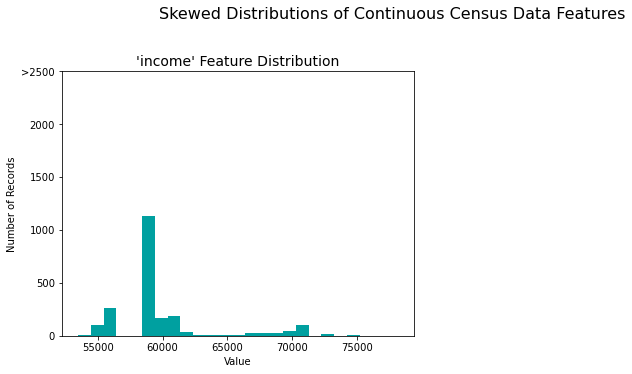

In [291]:
distribution(missing_income_data, ['income'])

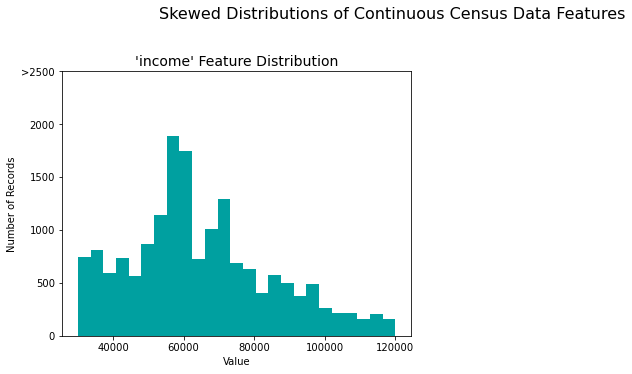

In [292]:
available_income_data[other_column] = available_income_data_other_data
missing_income_data[other_column] = missing_income_data_other_data
all_income_data = pd.concat([missing_income_data, available_income_data])
distribution(all_income_data, ['income'])

In [293]:
#drop unwanted features
all_cleaned_data = all_income_data.drop('gender_old', axis='columns')
all_cleaned_data

,gender,mem_year,mem_month,mem_day,total_spending,total_reward,total_offer_completed_bogo,total_offer_completed_discount,total_offer_completed_informational,average_offer_difficulty_bogo,...,total_web_offers,total_social_offers,total_mobile_offers,total_reward_earned,total_spent_on_offer,average_offer_difficulty,average_offer_duration,age,income,p_id
0,1,2017,2,12,20.40,5.0,0.0,2.0,0.0,0.000000,...,4.0,4.0,4.0,5.0,37.57,11.750000,8.500000,51.12317,56466.494845,6961
1,1,2018,7,12,14.30,0.0,0.0,0.0,0.0,5.000000,...,2.0,2.0,2.0,0.0,2.14,2.500000,5.000000,51.12317,70487.283331,3746
2,1,2017,8,4,4.65,0.0,0.0,0.0,0.0,0.000000,...,6.0,6.0,6.0,0.0,2.30,13.333333,7.833333,51.12317,60172.494172,10735
3,1,2017,9,25,0.00,0.0,0.0,0.0,0.0,10.000000,...,6.0,6.0,6.0,0.0,0.00,8.333333,7.666667,51.12317,59217.460317,9524
4,1,2017,10,2,0.24,0.0,0.0,0.0,0.0,8.333333,...,5.0,5.0,5.0,0.0,0.24,8.400000,6.600000,51.12317,58648.200566,6939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,2018,6,4,20.03,0.0,0.0,0.0,0.0,10.000000,...,3.0,3.0,3.0,0.0,6.76,5.666667,5.000000,45.00000,54000.000000,7264
16996,1,2018,7,13,25.97,5.0,1.0,0.0,0.0,5.000000,...,3.0,3.0,3.0,5.0,6.46,1.666667,4.666667,61.00000,72000.000000,2887
16997,1,2017,1,26,39.74,0.0,0.0,0.0,0.0,0.000000,...,3.0,3.0,3.0,0.0,30.11,6.666667,5.666667,49.00000,73000.000000,105
16998,0,2016,3,7,189.67,25.0,1.0,0.0,0.0,10.000000,...,1.0,1.0,1.0,10.0,57.50,10.000000,5.000000,83.00000,50000.000000,10567


In [294]:
all_cleaned_data.to_csv("all_cleaned_data.csv",index=False)

## 1.3.2 Discussion on Income Prediction
Similar to age the prediction might not be accurate but they are better than other method of predicting as we are trying to keep the relationship between feature intact

# 1.4 General Discussion
Now that we have cleaned all of our missing data it is time to move to actual goal of this study.